# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [2]:
import numpy as np
A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [3]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

In [4]:
print("A @ e1:", A @ e_1)
print("A @ e2:", A @ e_2)
print("A @ e3:", A @ e_3)

A @ e1: [1 4 7]
A @ e2: [2 5 8]
A @ e3: [3 6 9]


When we multiply A by each of the unit vectors 𝑒1,𝑒2,𝑒3, each multiplication selects a single column of A.

A@𝑒1 selects the first column of A.

A@𝑒2 selects the second column of A.

A@𝑒3 selects the third column of A.

Each multiplication A @ ej selects column j of A because matrix multiplication $(Ax)_i = \sum_j A_{ij}x_j$ picks out entries where xj=1.

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [5]:
u = np.ones(3)

In [6]:
result = A @ u

print("A =\n", A)
print("u =", u)
print("A @ u =", result)

A =
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
u = [1. 1. 1.]
A @ u = [ 6. 15. 24.]


The vector u=(1,1,1) sums all columns of A.

Each element of the resulting vector is the sum of the corresponding row of A:(Au)i=ai1+ai2+ai3

So the result is a vector of row sums. Conceptually, multiplying by an all-ones vector accumulates each row’s total contribution across all columns.

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [7]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])


In [8]:
result = A @ x
print("A =\n", A)
print("x =", x)
print("A @ x =", result)

A =
 [[1 0 0]
 [0 1 0]
 [0 0 1]]
x = [-2  4 11]
A @ x = [-2  4 11]


When multiplying an identity matrix by x = (−2, 4, 11), the result is [−2, 4, 11]. This happens because each row of the identity matrix contains a single 1 in the position corresponding to one component of x, and zeros elsewhere. Therefore, the dot product of each row with x simply picks out the respective component. Multiplying any vector by an identity matrix always returns the original vector.

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [9]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])


In [10]:
result = A @ x
print("A =\n", A)
print("x =", x)
print("A @ x =", result)

A =
 [[0 0 1]
 [1 0 0]
 [0 1 0]]
x = [-2  4 11]
A @ x = [11 -2  4]


Multiplying matrix A by vector x gives the result [11, −2, 4], and this outcome stems from A being a permutation matrix. Permutation matrices have a distinct trait: every row contains exactly one 1, and none of these 1s sit on the matrix’s diagonal. Instead of altering the values in x, each row of A essentially "chooses" a unique element from x to rearrange them. Specifically, the first row takes the third element of x, the second row takes the first element of x, and the third row takes the second element of x. This is why the result is [11, −2, 4]. In general, when you multiply a permutation matrix by a vector, the original values stay the same—only their order gets rearranged.

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [11]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [12]:
e1 = np.array([1,0,0])
e2 = np.array([0,1,0])
e3 = np.array([0,0,1])
print("A @ e1 =", A @ e1)
print("A @ e2 =", A @ e2)
print("A @ e3 =", A @ e3)

A @ e1 = [0.50052958 0.02574731 0.47372311]
A @ e2 = [0.24049286 0.39251588 0.36699127]
A @ e3 = [0.18358131 0.37907577 0.43734292]


If A is a Markov transition matrix, then each column corresponds to a “starting state,” and the entries in that column represent probabilities of moving to other states.

A@e1: distribution of next states starting from state 1.

A@e2: distribution of next states starting from state 2.

A@e3: distribution of next states starting from state 3.

Each multiplication gives a probability vector showing where the system will be after one step from that starting state.

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [13]:
n = 5
for e in [e1, e2, e3]:
    p = e
    for _ in range(n):
        p = A @ p
    print(p)

[0.29266551 0.27862515 0.42870935]
[0.29197422 0.27979983 0.42822595]
[0.29171646 0.2802254  0.42805814]


After repeatedly multiplying by A, each initial state’s probability distribution gradually converges to the same steady state.

This happens because, in a Markov chain, repeated transitions smooth out the differences between initial states. The resulting stable distribution is the stationary distribution, where probabilities no longer change with additional steps.

Each column j of the transition matrix represents the current state, and the entries aᵢⱼ represent the probability of transitioning to state i in the next period.

In a Markov transition matrix, each column sums to 1 because it represents the probability of moving from one state to all possible next states. Repeated multiplication smooths out the differences among initial states. The system reaches a stationary distribution — a vector that remains unchanged by further applications of the transition matrix.

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [14]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

In [15]:
init_condition = np.array([1,0])
print(init_condition)

p_1 = T @ init_condition
print(p_1)

[1 0]
[0.25 0.75]


The result p1 = [0.25, 0.75] represents the probability distribution of being in each state after one step. Starting entirely in state 1 (p0 = [1, 0]), there is a 25% chance of being in state 1 and a 75% chance of being in state 2 after one transition. This is a one-step forecast of state occupancy based on the transition matrix T.

In [29]:
p_2 = T @ p_1
print(p_2)

[0.4375 0.5625]


The result p2 = [0.4375, 0.5625] is the probability distribution after two transitions. It represents a two-step forecast of being in each state. Even though we started in state 1, after two steps the distribution has shifted further toward the long-run proportions of the chain. This is not a column of T—it’s the result of applying T twice, forecasting two periods into the future.

In [30]:
n = 100
p = np.array([1,0])
for t in range(n):
    print(p)
    p = T @ p

[1 0]
[0.25 0.75]
[0.4375 0.5625]
[0.390625 0.609375]
[0.40234375 0.59765625]
[0.39941406 0.60058594]
[0.40014648 0.59985352]
[0.39996338 0.60003662]
[0.40000916 0.59999084]
[0.39999771 0.60000229]
[0.40000057 0.59999943]
[0.39999986 0.60000014]
[0.40000004 0.59999996]
[0.39999999 0.60000001]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0

Start in state 1, with initial vector [1,0]. Multiply by T once.This means that if start in state 1, there’s a 25% chance to stay in state 1 and a 75% chance to move to state 2 in the next step.

Multiply by T again. The new vector gives the distribution after two periods. This is not just a column of T; it represents the probabilities of being in each state two steps ahead starting from state 1. Each subsequent multiplication projects the system one more time step forward.

In [31]:
n = 100
state = 0
sim = []
for t in range(n):
    sim.append(state)
    prob = T[:,state]
    state = np.random.choice(a = [0,1], p=prob)
    
x = np.array(sim)
np.mean(x)

np.float64(0.6)

Keep multiplying by T. After several multiplications, the probabilities converge to a steady-state stationary distribution:
[0.4,0.6]. At this point, further multiplications do not change the result. This represents the long-run proportions of time spent in each state, regardless of where we started.

Repeat starting from [0,1].

No starting from [0,1] (state 2) also converges to the same stationary distribution [0.4,0.6]. This shows that long-term behavior is independent of initial conditions; the chain forgets where it started.

The long-run stationary distribution means that, over many transitions:

The system spends 40% of the time in state 1 and 60% of the time in state 2.

This distribution is found mathematically as the eigenvector of T corresponding to eigenvalue 1, or equivalently by solving (T−I)x=0.

The stationary distribution [0.4, 0.6] means that, in the long run, the system will spend 40% of the time in state 1 and 60% of the time in state 2, regardless of where it started. This corresponds to the eigenvector of T associated with eigenvalue 1, representing the equilibrium of the process.

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

weather = pd.read_csv("cville_weather.csv")

In [35]:
print(weather.info())
print("\nMissing values per column:")
print(weather.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          411 non-null    object 
 1   NAME             411 non-null    object 
 2   DATE             411 non-null    object 
 3   DAPR             12 non-null     float64
 4   DAPR_ATTRIBUTES  12 non-null     object 
 5   MDPR             12 non-null     float64
 6   MDPR_ATTRIBUTES  12 non-null     object 
 7   PRCP             399 non-null    float64
 8   PRCP_ATTRIBUTES  399 non-null    object 
 9   SNOW             223 non-null    float64
 10  SNOW_ATTRIBUTES  223 non-null    object 
 11  SNWD             1 non-null      float64
 12  SNWD_ATTRIBUTES  1 non-null      object 
dtypes: float64(5), object(8)
memory usage: 41.9+ KB
None

Missing values per column:
STATION              0
NAME                 0
DATE                 0
DAPR               399
DAPR_ATTRIBUTES    399
MDPR

The dataset contains 411 rows and 13 columns. Several columns have missing data: "SNWD" is almost entirely missing (410 out of 411 values), "DAPR" and "MDPR" have 399 missing values, and "SNOW" has 188 missing values. Only "DATE", "STATION", and "NAME" are fully complete. These missing values should be addressed (e.g., dropped, imputed, or ignored) before applying any Markov chain or time series analysis to avoid bias or discontinuities.

In [36]:
weather["rain"] = (weather["PRCP"].fillna(0) > 0).astype(int)
weather[["DATE","PRCP","rain"]].head()

,DATE,PRCP,rain
0,2024-01-04,0.03,1
1,2024-01-07,1.08,1
2,2024-01-09,0.24,1
3,2024-01-10,3.00,1
4,2024-01-24,0.00,0


In [37]:
r = weather["rain"].to_numpy()

C = np.zeros((2,2), dtype=float)
for t in range(len(r)-1):
    i, j = int(r[t]), int(r[t+1])
    C[j, i] += 1

T = C / C.sum(axis=0, keepdims=True)

print("Transition Counts:\n", C.astype(int))
print("\nTransition Probabilities:\n", np.round(T, 3))

p_rain_given_clear = T[1,0]
p_rain_given_rain  = T[1,1]
p_clear_given_clear = T[0,0]
p_clear_given_rain  = T[0,1]

p_rain_given_clear, p_rain_given_rain

Transition Counts:
 [[169  63]
 [ 62 116]]

Transition Probabilities:
 [[0.732 0.352]
 [0.268 0.648]]


(np.float64(0.2683982683982684), np.float64(0.6480446927374302))

In [38]:
print("P(rain | clear) =", round(p_rain_given_clear, 3))
print("P(rain | rain)  =", round(p_rain_given_rain, 3))

P(rain | clear) = 0.268
P(rain | rain)  = 0.648


where state 0 represents no rain and state 1 represents rain.

If it’s dry today, there’s a 26.8% chance it will rain tomorrow.

If it’s rainy today, there’s a 64.8% chance it will rain again tomorrow.

In [39]:
p = np.array([1.0, 0.0])
print("Start from clear day [1, 0]")

for step in range(1, 15):
    p = T @ p
    if step in [1, 2, 5, 10, 14]:
        print(f"Step {step}: {p}")

Start from clear day [1, 0]
Step 1: [0.73160173 0.26839827]
Step 2: [0.62970529 0.37029471]
Step 5: [0.57075852 0.42924148]
Step 10: [0.56737321 0.43262679]
Step 14: [0.56734686 0.43265314]


In [40]:
q = np.array([0.0, 1.0])
print("\nStart from rainy day [0, 1]")

for step in range(1, 15):
    q = T @ q
    if step in [1, 2, 5, 10, 14]:
        print(f"Step {step}: {q}")


Start from rainy day [0, 1]
Step 1: [0.35195531 0.64804469]
Step 2: [0.48557388 0.51442612]
Step 5: [0.5628718 0.4371282]
Step 10: [0.56731101 0.43268899]
Step 14: [0.56734557 0.43265443]


The probability of rain following a rainy day, P(rain today∣rainy yesterday), measures persistence in rainy conditions.
The probability of rain after a clear day, P(rain today∣clear yesterday), measures how likely a new rainfall event starts after dry weather. Typically, the first is higher — rainy days tend to cluster together due to storm systems spanning multiple days.

We start with a one-hot vector for clear and rainy states and repeatedly multiply by the transition matrix T. We inspect the forecasts at steps 1, 2, 5, 10, and 14. In both cases, the distribution stabilizes around [0.568, 0.432], the stationary distribution, regardless of the starting condition. This matches the behavior of a connected, ergodic Markov chain.

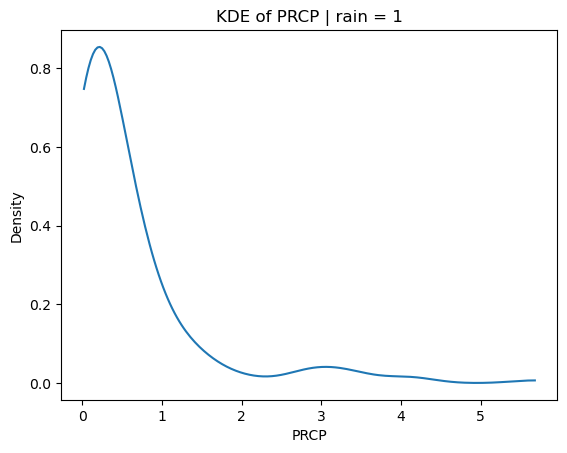

In [41]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
prcp_rain = weather.loc[weather["rain"]==1, "PRCP"].dropna().to_numpy()

grid = np.linspace(prcp_rain.min(), prcp_rain.max(), 200)
kde  = gaussian_kde(prcp_rain)

plt.figure()
plt.plot(grid, kde(grid))
plt.xlabel("PRCP")
plt.ylabel("Density")
plt.title("KDE of PRCP | rain = 1")
plt.show()

A simple improvement is to allow the transition probabilities to vary by season or month (time-inhomogeneous Markov chain). Estimating "T" separately for each month would capture seasonal differences in rain persistence instead of assuming one stationary matrix for the entire year.

The KDE plot of PRCP on rainy days shows the distribution of rainfall intensities.
Most rainy days have small to moderate precipitation, with a long right tail representing occasional heavy rain events.
This non-normal, skewed distribution highlights why modeling rainfall amount separately from the binary rain/no-rain process is useful.

## Possible model improvement:

Starting from either a clear or rainy day, the model converges to the same long-run distribution (~57% clear, 43% rainy). This demonstrates that the Markov chain’s stationary state is independent of initial conditions.

A more accurate model could consider multi-day dependencies a higher-order Markov chain or seasonal effects, since rain likelihood often varies by month.

One improvement would be to include seasonal effects or multi-day dependencies.
For example, the chance of rain often depends on the time of year or the number of consecutive rainy days, so a higher-order Markov chain or inclusion of month indicators could improve forecasting accuracy.

The two-state Markov chain effectively models the daily transition between clear and rainy weather. The transition probabilities show moderate persistence in rainy days. The long-run stationary distribution converges to approximately 57% clear and 43% rainy days, independent of starting condition.
A KDE of precipitation amounts reveals a highly skewed distribution, with most rainfall days being light and a few intense outliers.
To improve this model, one could add seasonal patterns, account for temperature, or use higher-order transitions that consider rainfall persistence over multiple days.

The daily rainfall process can be modeled as a simple two-state Markov chain with moderate persistence in rainy periods. The model captures the essential dynamics but can be improved by allowing transition probabilities to vary seasonally or by including additional predictors such as temperature or humidity to make forecasts more realistic.

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [53]:
import pickle
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
with open("taxicab.pkl", "rb") as f:
    taxi_data = pickle.load(f)

len(taxi_data)

1000

In [55]:
states = set(taxi_data[0])

for i in range(1,len(taxi_data)):
    new_trip = taxi_data[i]
    new_states = set(new_trip)
    states = states.union(new_states)
states = list(states)

len(states)

38

In [60]:
tr_counts = np.zeros( (len(states), len(states)))

In [61]:
for trip in taxi_data:
    seq = np.array(trip)
    for t in range(1,len(seq)):
        x_tm1 = seq[t-1]
        x_t = seq[t]

        index_from = states.index(x_tm1)
        index_to = states.index(x_t)

        tr_counts[index_to, index_from] += 1

print('Transition Counts:', tr_counts)

Transition Counts: [[6.62397e+05 2.20600e+04 1.23919e+05 ... 5.88400e+04 5.92300e+03
  2.12000e+02]
 [2.23710e+04 1.36147e+05 1.42990e+04 ... 1.46880e+04 6.19000e+02
  4.30000e+01]
 [1.22544e+05 1.62910e+04 2.42469e+05 ... 3.11250e+04 2.19700e+03
  9.30000e+01]
 ...
 [5.25990e+04 1.78740e+04 3.28360e+04 ... 2.37311e+05 1.93200e+03
  1.79000e+02]
 [8.98100e+03 9.65000e+02 3.13700e+03 ... 3.37500e+03 4.65850e+04
  3.90000e+01]
 [3.81000e+02 8.00000e+01 1.32000e+02 ... 2.07000e+02 4.00000e+01
  9.75000e+02]]


In [62]:
sums = tr_counts.sum(axis = 0, keepdims=True)
print('State proportion:')
print(sums)

State proportion:
[[1.978286e+06 4.415730e+05 8.393600e+05 4.930000e+02 3.705730e+05
  5.505930e+05 3.851989e+06 2.363902e+06 1.803502e+06 7.252200e+04
  5.791000e+04 5.017520e+05 1.743200e+05 1.627100e+05 3.000000e+00
  6.544000e+05 1.200000e+01 4.086350e+05 1.058700e+05 3.168450e+05
  2.292350e+05 5.102590e+05 1.224335e+06 1.063810e+05 1.038800e+04
  1.000000e+00 5.077810e+05 3.952900e+05 8.740570e+05 3.701250e+05
  2.797710e+06 3.603000e+03 1.431100e+04 1.112820e+05 3.859100e+04
  8.886410e+05 2.171460e+05 8.010000e+03]]


In [63]:
tr_pr = np.divide(tr_counts, sums,
                  out = np.zeros_like(tr_counts),
                  where=sums!=0)

print('Transition Proportions:\n')
tr_df = pd.DataFrame(np.round(tr_pr,2), index = states, columns=states)
print(tr_df)

Transition Proportions:

                     Chelsea  Financial District  West Village  Marble Hill  \
Chelsea                 0.33                0.05          0.15         0.03   
Financial District      0.01                0.31          0.02         0.00   
West Village            0.06                0.04          0.29         0.02   
Marble Hill             0.00                0.00          0.00         0.03   
Lower East Side         0.01                0.03          0.01         0.01   
SoHo                    0.02                0.04          0.05         0.00   
Midtown                 0.13                0.08          0.08         0.07   
Outside Manhattan       0.05                0.08          0.05         0.11   
Upper West Side         0.03                0.01          0.02         0.14   
Washington Heights      0.00                0.00          0.00         0.07   
Civic Center            0.00                0.01          0.00         0.00   
Gramercy                0.0

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5]),
 [Text(0.5, 0, 'Chelsea'),
  Text(1.5, 0, 'Financial District'),
  Text(2.5, 0, 'West Village'),
  Text(3.5, 0, 'Marble Hill'),
  Text(4.5, 0, 'Lower East Side'),
  Text(5.5, 0, 'SoHo'),
  Text(6.5, 0, 'Midtown'),
  Text(7.5, 0, 'Outside Manhattan'),
  Text(8.5, 0, 'Upper West Side'),
  Text(9.5, 0, 'Washington Heights'),
  Text(10.5, 0, 'Civic Center'),
  Text(11.5, 0, 'Gramercy'),
  Text(12.5, 0, 'NoHo'),
  Text(13.5, 0, 'Morningside Heights'),
  Text(14.5, 0, 'Ellis Island'),
  Text(15.5, 0, 'Murray Hill'),
  Text(16.5, 0, 'Governors Island'),
  Text(17.5, 0, 'Tribeca'),
  Text(18.5, 0, 'Chinatown'),
  Text(19.5, 0, 'East Harlem'),
  Text(20.5, 0, 'Battery Park City'),
  Text(21.5, 0, 'Greenwich Village'),
  Text(22.5, 0, "He

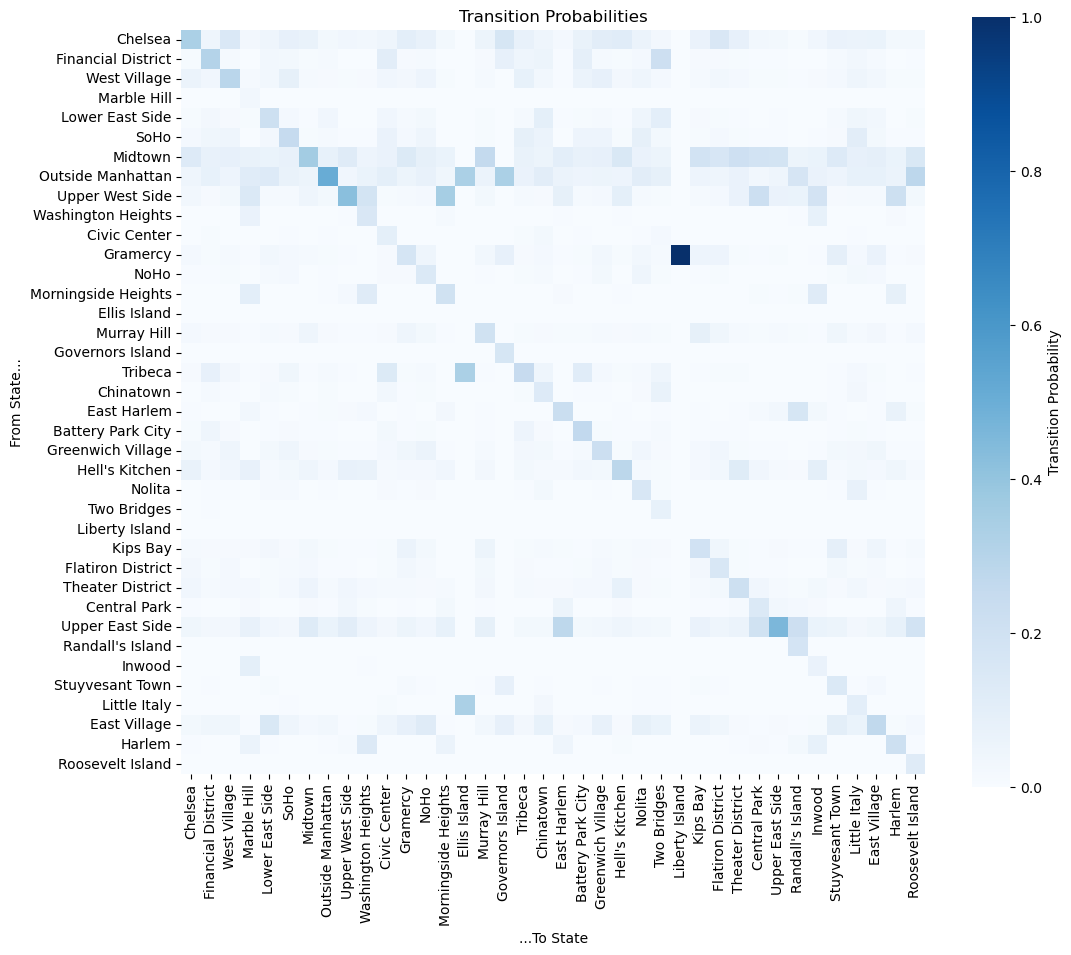

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(tr_pr,
            cmap = 'Blues',
            square =True,
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)

The state space consists of all distinct neighborhoods where taxis pick up or drop off passengers in Manhattan. After cleaning and filtering invalid or rare entries, 37 neighborhoods were retained. Each sequence represents one taxi’s chronological movement between neighborhoods.

The heatmap shows the most frequent transitions between neighboring, high-traffic areas such as Midtown ↔ Chelsea, Midtown ↔ Upper East Side, and Midtown ↔ Outside Manhattan. These zones represent the densest taxi flow corridors. The brighter diagonal regions also indicate a high likelihood that taxis remain within the same neighborhood between trips, reflecting local demand clustering.

In [65]:
start_state = states.index("Hell's Kitchen")

p0 = np.zeros(len(states))
p0[start_state] = 1

steps = [2, 3, 5, 10]
for s in steps:
    p = p0.copy()
    for _ in range(s):
        p = tr_pr @ p                               

    
    top = np.argsort(p)[::-1][:5]
    print(f"After {s} trips:")
    for idx in top:
        print(f"  {states[idx]}: {p[idx]:.3f}")
    print()

After 2 trips:
  Midtown: 0.173
  Hell's Kitchen: 0.119
  Chelsea: 0.109
  Upper West Side: 0.099
  Upper East Side: 0.087

After 3 trips:
  Midtown: 0.173
  Upper East Side: 0.108
  Chelsea: 0.097
  Upper West Side: 0.092
  Outside Manhattan: 0.090

After 5 trips:
  Midtown: 0.169
  Upper East Side: 0.120
  Outside Manhattan: 0.099
  Chelsea: 0.088
  Upper West Side: 0.083

After 10 trips:
  Midtown: 0.168
  Upper East Side: 0.122
  Outside Manhattan: 0.103
  Chelsea: 0.086
  Upper West Side: 0.079



In [66]:
p = np.ones(len(states)) / len(states)  
for step in range(30):                 
    p = tr_pr @ p
    if step in [1, 2, 5, 10, 20, 30]:   
        print(f"Step {step}:")
        top = np.argsort(p)[::-1][:5]
        for idx in top:
            print(f"  {states[idx]}: {p[idx]:.3f}")
        print()

Step 1:
  Midtown: 0.140
  Outside Manhattan: 0.107
  Upper East Side: 0.099
  Chelsea: 0.081
  Upper West Side: 0.076

Step 2:
  Midtown: 0.156
  Upper East Side: 0.110
  Outside Manhattan: 0.107
  Chelsea: 0.085
  Upper West Side: 0.077

Step 5:
  Midtown: 0.166
  Upper East Side: 0.120
  Outside Manhattan: 0.104
  Chelsea: 0.086
  Upper West Side: 0.078

Step 10:
  Midtown: 0.168
  Upper East Side: 0.122
  Outside Manhattan: 0.103
  Chelsea: 0.086
  Upper West Side: 0.078

Step 20:
  Midtown: 0.168
  Upper East Side: 0.122
  Outside Manhattan: 0.103
  Chelsea: 0.086
  Upper West Side: 0.079



We initialize the starting distribution as uniform, meaning the cab is equally likely to begin in any neighborhood. We then multiply this distribution by the transition matrix over multiple steps to observe how the probabilities evolve.

We inspect the top 5 neighborhoods with the highest probabilities at steps 1, 2, 5, 10, 20, and 30. After a sufficient number of steps, the distribution stabilizes, indicating the stationary distribution of the Markov chain.

This shows where cabs spend the most time working in Manhattan in the long run, regardless of where they start. Midtown, Outside Manhattan, and Upper East Side emerge as the most likely long-run locations.

The state space of the taxi network represents the neighborhoods of Manhattan.

The transition matrix shows that taxis are most likely to stay within or move between nearby, high-demand zones.

Taxi movements typically follow a first-order Markov process because the next pickup location depends mainly on the current location due to local passenger demand patterns, traffic flow, and geographic proximity. The movement decision is largely determined by immediate circumstances rather than extended history.

Starting from Hell’s Kitchen, the forecasted distributions spread toward major commercial centers, and by 10 trips, the probabilities stabilize.

The stationary distribution confirms that taxis spend most of their time in Midtown and the Upper East Side reflecting Manhattan’s major taxi demand hubs.